In [67]:
# import packages
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

2024-03-26 15:30:23.395014: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


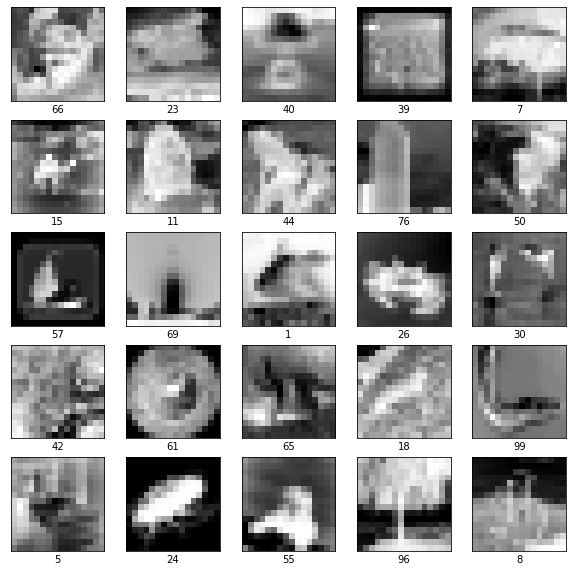

In [66]:
# Datasets
train = tf.data.Dataset.load('/home/ubuntu/tensorflow_datasets/cifar100_grey_16x16/train')
test  = tf.data.Dataset.load('/home/ubuntu/tensorflow_datasets/cifar100_grey_16x16/test')

def preprocess(example):
    image = example['image']
    image.set_shape([16, 16, 1])
    label = example['label']
    label = tf.one_hot(label, depth=100)  # One-hot encode the labels
    return image, label

# format and cache
train = train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)
test = test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(128)
test = test.cache()
test = test.prefetch(tf.data.AUTOTUNE)

# Get the first batch of images and labels from the training dataset
images, labels = next(iter(train))

# Create a figure
plt.figure(figsize=(10,10))

# Plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape the image
    image = np.reshape(images[i], (16, 16))
    plt.imshow(image, cmap=plt.cm.binary)
    # Get the label for the image
    label = np.argmax(labels[i])
    plt.xlabel(label)
plt.show()



In [63]:
# Model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Softmax()
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

In [64]:
# Train
history = model.fit(train, epochs=15, validation_data=test)

# Convert the history.history dict to a pandas DataFrame
hist_df = pd.DataFrame(history.history)

# Save to csv
hist_df.to_csv('history.csv')

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0171 - loss: 0.0099 - val_accuracy: 0.0595 - val_loss: 0.0098
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0684 - loss: 0.0097 - val_accuracy: 0.0889 - val_loss: 0.0096
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1003 - loss: 0.0096 - val_accuracy: 0.1107 - val_loss: 0.0096
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1215 - loss: 0.0095 - val_accuracy: 0.1243 - val_loss: 0.0095
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1386 - loss: 0.0094 - val_accuracy: 0.1362 - val_loss: 0.0094
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1524 - loss: 0.0093 - val_accuracy: 0.1419 - val_loss: 0.0094
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1647 - loss: 0.0092 - val_accuracy: 0.1498 - val_loss: 0.0093
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1752 - loss: 0.0091 - val_accuracy: 0.